In [1]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.6 MB/s eta 0:00:00


In [2]:
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import itertools
import time
import random

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import imblearn
from imblearn.over_sampling import SMOTE
from keras.layers import BatchNormalization,Dropout,Bidirectional,LSTM

from keras.losses import categorical_crossentropy
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Convolution2D as Conv2D
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

<ipython-input-2-e12c30e4b52a>:35: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
raw_data = loadarff("/content/ECG5000_TEST.arff")

In [4]:
df1 = pd.DataFrame(raw_data[0])

In [5]:
df1

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,b'1'
1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,b'1'
2,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,b'1'
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,b'1'
4,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,...,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,b'4'
4496,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,b'2'
4497,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,-0.733839,...,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531,b'2'
4498,-1.124432,-1.905039,-2.192707,-2.904320,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,-0.938473,...,-2.821782,-3.268355,-3.634981,-3.168765,-2.245878,-1.262260,-0.443307,-0.559769,0.108568,b'2'


In [6]:
raw_data = loadarff("/content/ECG5000_TRAIN.arff")
df2 = pd.DataFrame(raw_data[0])
df2

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,b'1'
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,b'1'
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,b'1'
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,b'1'
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,-1.359872,...,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161,b'4'
496,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,-0.891843,...,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958,b'4'
497,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,-1.690706,...,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028,b'4'
498,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,-0.434310,...,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534,b'5'


In [7]:
df = pd.concat([df1, df2])
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,b'1'
1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,b'1'
2,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,b'1'
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,b'1'
4,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,...,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,-1.359872,...,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161,b'4'
496,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,-0.891843,...,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958,b'4'
497,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,-1.690706,...,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028,b'4'
498,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,-0.434310,...,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534,b'5'


In [8]:
df['target'] = df['target'].apply(lambda x: x.decode('utf-8').replace("b'", "").replace("'", ""))
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,1
1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,1
2,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,1
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,1
4,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,...,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,-1.359872,...,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161,4
496,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,-0.891843,...,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958,4
497,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,-1.690706,...,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028,4
498,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,-0.434310,...,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534,5


In [9]:
df.dtypes

att1      float64
att2      float64
att3      float64
att4      float64
att5      float64
           ...   
att137    float64
att138    float64
att139    float64
att140    float64
target     object
Length: 141, dtype: object

In [10]:
df['target'] = df['target'].astype(float)

In [11]:
df.dtypes

att1      float64
att2      float64
att3      float64
att4      float64
att5      float64
           ...   
att137    float64
att138    float64
att139    float64
att140    float64
target    float64
Length: 141, dtype: object

## Cleaning dataset

In [12]:
print(df['target'].isnull().sum())
print(df['target'].unique())

0
[1. 2. 3. 4. 5.]


In [13]:
"""
id_to_label = {
    '1': "Normal",
    '2': "Artial Premature",
    '3': "Premature ventricular contraction",
    '4': "Fusion of ventricular and normal",
    '5': "Fusion of paced and normal"
}
df['target'] = df['target'].map(id_to_label)
"""

'\nid_to_label = {\n    \'1\': "Normal",\n    \'2\': "Artial Premature",\n    \'3\': "Premature ventricular contraction",\n    \'4\': "Fusion of ventricular and normal",\n    \'5\': "Fusion of paced and normal"\n}\ndf[\'target\'] = df[\'target\'].map(id_to_label)\n'

In [14]:
df.head(5)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,1.0
1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,1.0
2,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,1.0
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,1.0
4,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,...,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,1.0


## Data Augementation (SMOTE resampling)

In [15]:
df['target'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: target, dtype: int64

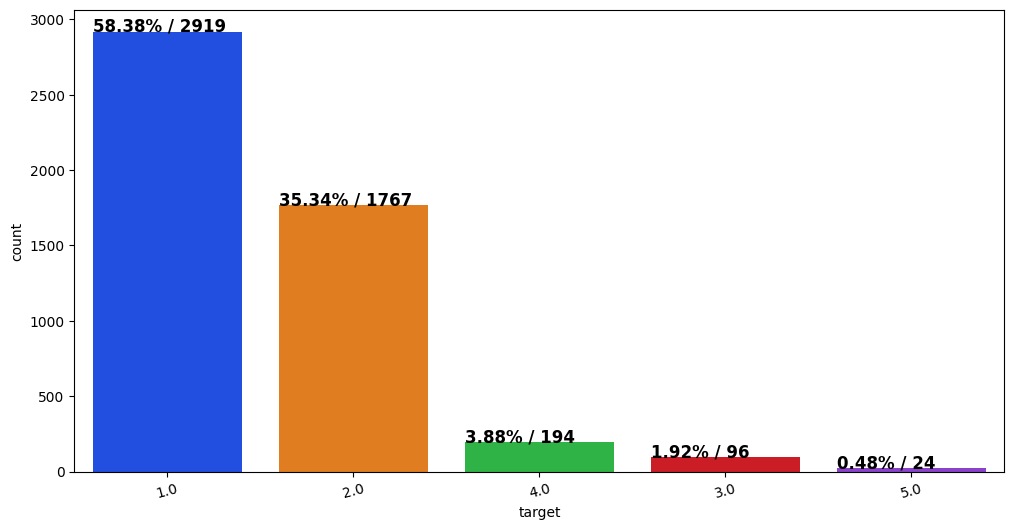

In [16]:
percentages = [count / df.shape[0] * 100 for count in df['target'].value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=df['target'],
    ax=ax,
    palette="bright",
    order=df['target'].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    df['target'].value_counts(sort=True).values,
    ax.patches):
    
    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')
    
plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

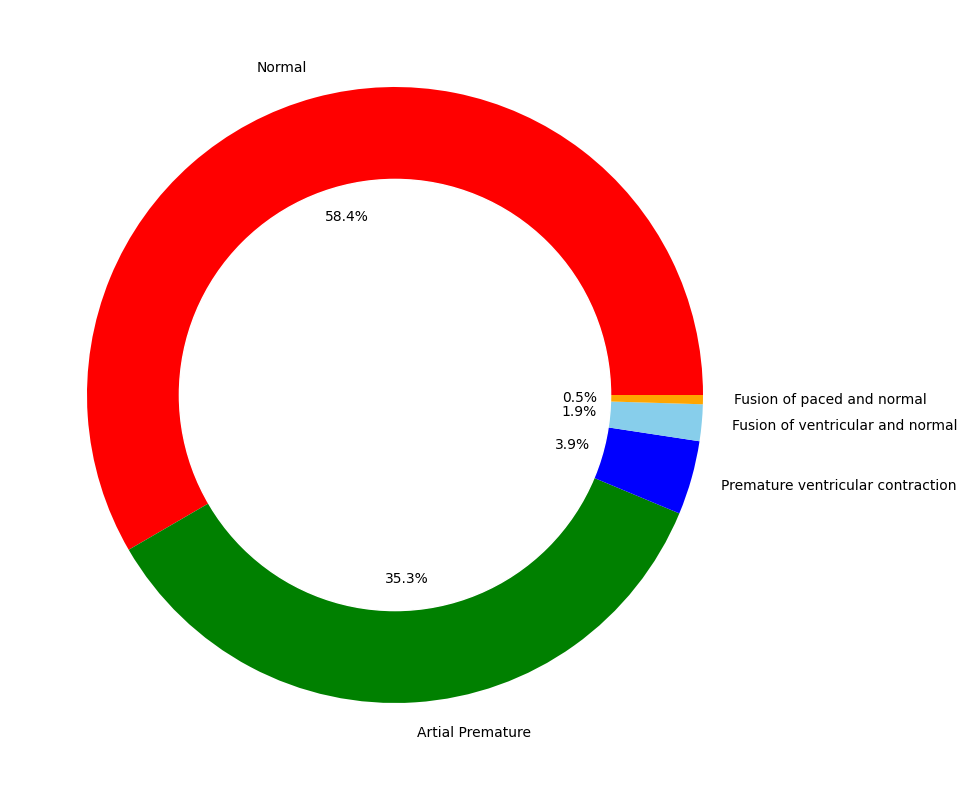

In [17]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(df['target'].value_counts(), labels=['Normal','Artial Premature','Premature ventricular contraction','Fusion of ventricular and normal','Fusion of paced and normal'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
data_1 = df[df["target"] == 1]
data_2 = df[df["target"] == 2]
data_3 = df[df["target"] == 3]
data_4 = df[df["target"] == 4]
data_5 = df[df["target"] == 5]


In [19]:
from sklearn.utils import resample
data_1_resample = resample(data_1, n_samples=20000, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=20000, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=20000, 
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=20000, 
                           random_state=123, replace=True)

In [20]:
train_dataset = pd.concat([data_5_resample, data_1_resample, data_2_resample, data_3_resample, 
                          data_4_resample])

In [21]:
train_dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
3360,0.366155,-0.813771,-1.503020,-2.856105,-3.019006,-3.216679,-2.798837,-2.167081,-1.407703,-0.830927,...,-2.385297,-2.742860,-3.197087,-3.343658,-3.084722,-2.672918,-1.052041,-0.590285,1.300554,5.0
2813,-0.084942,-0.960786,-1.301019,-1.712707,-2.284085,-2.714194,-3.003980,-3.300124,-3.514020,-3.504454,...,0.665040,0.664337,0.618862,0.701566,0.867772,0.759582,0.428206,0.571943,1.514304,5.0
2813,-0.084942,-0.960786,-1.301019,-1.712707,-2.284085,-2.714194,-3.003980,-3.300124,-3.514020,-3.504454,...,0.665040,0.664337,0.618862,0.701566,0.867772,0.759582,0.428206,0.571943,1.514304,5.0
2929,-0.041860,0.199407,0.652002,0.899509,1.227280,1.105721,1.086423,1.153592,1.148754,1.174345,...,0.799520,0.878151,0.913705,0.977138,1.002193,0.915948,0.918284,0.792190,0.805242,5.0
3507,-0.771630,-2.232628,-3.152674,-3.581292,-3.378039,-3.094399,-2.536773,-1.748678,-1.042883,-0.975582,...,-1.170622,-1.515581,-2.103121,-2.825158,-3.409660,-3.322502,-2.464701,-1.016952,0.185271,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,-2.036213,-2.935980,-3.638401,-3.892018,-3.801315,-3.216726,-2.455610,-1.717345,-1.494549,-1.304859,...,0.954609,0.784390,0.698442,0.653446,0.785857,0.931829,1.158112,1.158192,0.270931,4.0
3689,-0.052029,-1.166668,-1.760398,-2.468790,-2.846996,-3.081430,-2.920062,-2.597700,-2.206110,-1.547013,...,-2.544778,-3.215986,-3.650375,-3.411444,-2.814130,-1.826358,-0.689839,-0.515141,0.438252,4.0
2912,0.423644,-0.556992,-1.064779,-2.085770,-2.653392,-3.125218,-3.163182,-3.068716,-2.797393,-2.153900,...,2.360101,2.854680,2.707110,2.033384,1.600893,1.280609,1.600487,1.042431,1.237363,4.0
3091,0.897485,0.257502,-0.437376,-1.005904,-1.735327,-2.252272,-2.428399,-2.366986,-1.915568,-1.565518,...,2.012756,2.019352,2.415682,2.880372,2.900458,2.353758,1.731006,1.572376,1.723486,4.0


In [22]:
df = train_dataset

In [23]:
Y = df.iloc[:, -1]

X = df.iloc[:, 0:-1]


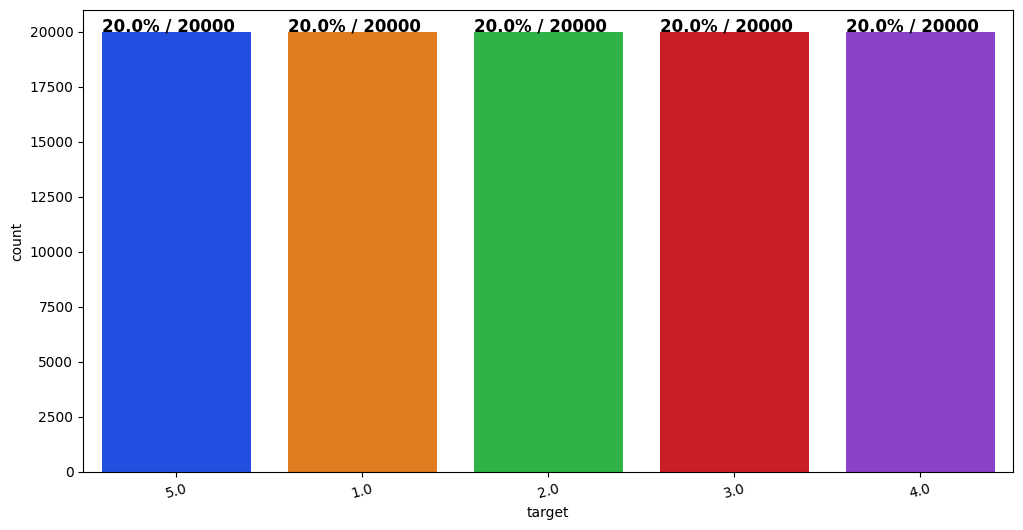

In [24]:
percentages = [count / Y.shape[0] * 100 for count in Y.value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=Y,
    ax=ax,
    palette="bright",
    order=Y.value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    Y.value_counts(sort=True).values,
    ax.patches):
    
    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')
    
plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

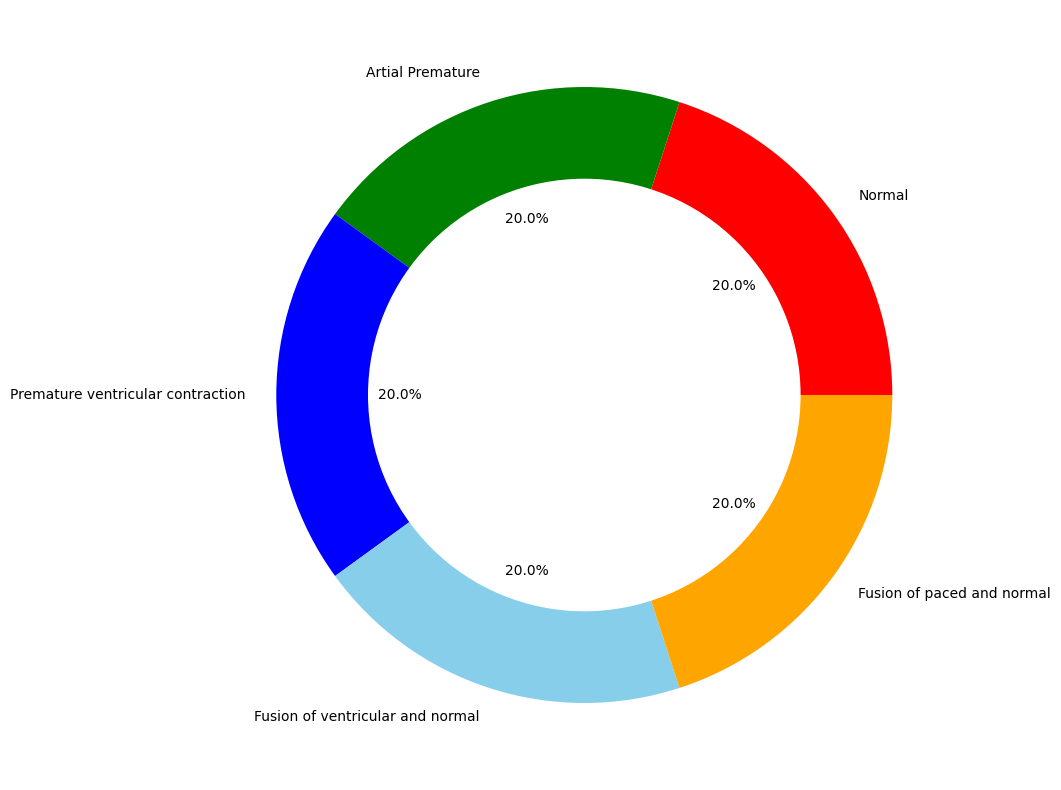

In [25]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(Y.value_counts(), labels=['Normal','Artial Premature','Premature ventricular contraction','Fusion of ventricular and normal','Fusion of paced and normal'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Splitting resampled dataset 


In [26]:
raw_data = df.values
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=21
)

## Normalize the rasampled dataset

In [27]:

min_val = X_train.min().min()
max_val = X_train.max().max()


X_train = (X_train - min_val) / (max_val - min_val)
X_test = (X_test - min_val) / (max_val - min_val)

X_train = tf.cast(X_train, tf.float32)
X_test = tf.cast(X_test, tf.float32)


In [28]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [29]:
X_train.shape

(80000, 140, 1)

# RNN LSTM MODEL

## Construct the LSTM Model  (one lstm layer with 64 cells no dropouts adam optimizer)


In [30]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(140,1)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=Adam(learning_rate=0.001),
  metrics=["accuracy"],
)	



model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 17,802
Trainable params: 17,674
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/10
1250/1250 [==============================] - 27s 13ms/step - loss: 0.8585 - accuracy: 0.6831 - val_loss: 0.5837 - val_accuracy: 0.7658
Epoch 2/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.5088 - accuracy: 0

## Construct the LSTM Model  (one lstm layer with 64 cells with dropouts adam optimizer)


In [31]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(140,1)))
model.add(layers.BatchNormalization())
model.add(Dropout(0.2));
model.add(layers.Dense(10))
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=Adam(learning_rate=0.001),
  metrics=["accuracy"],
)	



model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 17,802
Trainable params: 17,674
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/10
1250/1250 [==============================] - 13s 9ms/step - loss: 0.9878 - accuracy: 0.6421 - val_

## Construct the LSTM Model  (one lstm layer with 64 cells no dropouts sgd optimizer)


In [32]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(140,1)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=SGD(learning_rate=0.001),
  metrics=["accuracy"],
)	



model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 17,802
Trainable params: 17,674
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8753 - accuracy: 0.3814 - val_loss: 1.6914 - val_accuracy: 0.4457
Epoch 2/10
1250/1250 [==============================] - 11s 8ms/step - loss: 1.6177 - accuracy: 

## Construct the LSTM Model  (one lstm layer with 64 cells with dropouts sgd optimizer)


In [33]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(140,1)))
model.add(layers.BatchNormalization())
model.add(Dropout(0.2));
model.add(layers.Dense(10))
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=SGD(learning_rate=0.001),
  metrics=["accuracy"],
)	



model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 17,802
Trainable params: 17,674
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/10
1250/1250 [==============================] - 14s 9ms/step - loss: 1.9309 - accuracy: 0.3654 - val_

## Construct the LSTM Model (two lstm layer with 64 cells no dropouts adam optimizer)


In [34]:
model = keras.Sequential()
model.add(layers.LSTM(64, return_sequences=True,input_shape=(140,1)))
model.add(layers.LSTM(64,return_sequences=False))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=Adam(learning_rate=0.001),
  metrics=["accuracy"],
)	



model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 140, 64)           16896     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,826
Trainable params: 50,698
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/10
1250/1250 [==============================] - 20s 14ms/step - loss: 0.7188 - accuracy: 0.7326 - val

## Construct the LSTM Model (two lstm layer with 64 cells with dropouts adam optimizer)


In [35]:
model = keras.Sequential()
model.add(layers.LSTM(64, return_sequences=True,input_shape=(140,1)))
model.add(layers.LSTM(64,return_sequences=False))
model.add(layers.BatchNormalization())
model.add(Dropout(0.2));
model.add(layers.Dense(10))
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=Adam(learning_rate=0.001),
  metrics=["accuracy"],
)	



model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 140, 64)           16896     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,826
Trainable params: 50,698
Non-trainable params: 128
________________________________________________

## Construct the LSTM Model (two lstm layer with 64 cells no dropouts sgd optimizer)


In [36]:
model = keras.Sequential()
model.add(layers.LSTM(64, return_sequences=True,input_shape=(140,1)))
model.add(layers.LSTM(64,return_sequences=False))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=SGD(learning_rate=0.001),
  metrics=["accuracy"],
)	



model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 140, 64)           16896     
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,826
Trainable params: 50,698
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/10
1250/1250 [==============================] - 20s 14ms/step - loss: 1.9005 - accuracy: 0.3825 - val

## Construct the LSTM Model (two lstm layer with 64 cells with dropouts sgd optimizer)


In [37]:
model = keras.Sequential()
model.add(layers.LSTM(64, return_sequences=True,input_shape=(140,1)))
model.add(layers.LSTM(64,return_sequences=False))
model.add(layers.BatchNormalization())
model.add(Dropout(0.2));
model.add(layers.Dense(10))
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=SGD(learning_rate=0.001),
  metrics=["accuracy"],
)	



model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 140, 64)           16896     
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,826
Trainable params: 50,698
Non-trainable params: 128
________________________________________________

# BIDIRECTIONAL LSTM

## Adam Optimizer

### Construct the BI-LSTM Model  


In [38]:
input_shape=X_train.shape
model = keras.Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(140,1))))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
model.build(input_shape) 
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=Adam(learning_rate=0.001),
  metrics=["accuracy"],
)	




model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (80000, 128)             33792     
 l)                                                              
                                                                 
 batch_normalization_8 (Batc  (80000, 128)             512       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (80000, 10)               1290      
                                                                 
Total params: 35,594
Trainable params: 35,338
Non-trainable params: 256
_________________________________________________________________
None
Epoch 1/10
1250/1250 [==============================] - 22s 15ms/step - loss: 0.7258 - accuracy: 0.7304 - val_loss: 0.6520 - val_accuracy: 0.7282
Epoch 2/10
1250/1250 [=======

### Construct the BI-LSTM Model two lstm layers


In [39]:
input_shape=X_train.shape
model = keras.Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True,input_shape=(140,1))))
model.add(Bidirectional(LSTM(64, return_sequences=False,input_shape=(140,1))))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
model.build(input_shape) 
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=Adam(learning_rate=0.001),
  metrics=["accuracy"],
)	




model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (80000, 140, 128)        33792     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (80000, 128)             98816     
 nal)                                                            
                                                                 
 batch_normalization_9 (Batc  (80000, 128)             512       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (80000, 10)               1290      
                                                                 
Total params: 134,410
Trainable params: 134,154
Non-trainable params: 256
______________________________________________

###  Construct the BI-LSTM Model two lstm layers with dropout

In [40]:
input_shape=X_train.shape
model = keras.Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True,input_shape=(140,1))))
model.add(Bidirectional(LSTM(64, return_sequences=False,input_shape=(140,1))))
model.add(layers.BatchNormalization())
model.add(Dropout(0.2));
model.add(layers.Dense(10))
model.build(input_shape) 
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=Adam(learning_rate=0.001),
  metrics=["accuracy"],
)	




model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (80000, 140, 128)        33792     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (80000, 128)             98816     
 nal)                                                            
                                                                 
 batch_normalization_10 (Bat  (80000, 128)             512       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (80000, 128)              0         
                                                                 
 dense_10 (Dense)            (80000, 10)               1290      
                                                     

## SGD Optimizer

### Construct the BI-LSTM Model  


In [41]:
input_shape=X_train.shape
model = keras.Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(140,1))))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
model.build(input_shape) 
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=SGD(learning_rate=0.001),
  metrics=["accuracy"],
)	




model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirectio  (80000, 128)             33792     
 nal)                                                            
                                                                 
 batch_normalization_11 (Bat  (80000, 128)             512       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (80000, 10)               1290      
                                                                 
Total params: 35,594
Trainable params: 35,338
Non-trainable params: 256
_________________________________________________________________
None
Epoch 1/10
1250/1250 [==============================] - 21s 14ms/step - loss: 1.8521 - accuracy: 0.3963 - val_loss: 1.5939 - val_accuracy: 0.4947
Epoch 2/10
1250/1250 [======

### Construct the BI-LSTM Model two lstm layers


In [42]:
input_shape=X_train.shape
model = keras.Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True,input_shape=(140,1))))
model.add(Bidirectional(LSTM(64, return_sequences=False,input_shape=(140,1))))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
model.build(input_shape) 
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=SGD(learning_rate=0.001),
  metrics=["accuracy"],
)	




model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (80000, 140, 128)        33792     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (80000, 128)             98816     
 nal)                                                            
                                                                 
 batch_normalization_12 (Bat  (80000, 128)             512       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (80000, 10)               1290      
                                                                 
Total params: 134,410
Trainable params: 134,154
Non-trainable params: 256
_____________________________________________

###  Construct the BI-LSTM Model two lstm layers with dropout

In [43]:
input_shape=X_train.shape
model = keras.Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True,input_shape=(140,1))))
model.add(Bidirectional(LSTM(64, return_sequences=False,input_shape=(140,1))))
model.add(layers.BatchNormalization())
model.add(Dropout(0.2));
model.add(layers.Dense(10))
model.build(input_shape) 
print(model.summary())
print("==============================================================================")
print("==============================================================================")
model.compile(
  loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=SGD(learning_rate=0.001),
  metrics=["accuracy"],
)	


hist = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10
)
print("===============================================================================")
print("===============================================================================")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final Accuracy: %.2f%%" % (scores[1]*100))

print("===============================================================================")
print("===============================================================================")


predictions=model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, predictions))
print("===============================================================================")
print("===============================================================================")



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (80000, 140, 128)        33792     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (80000, 128)             98816     
 nal)                                                            
                                                                 
 batch_normalization_13 (Bat  (80000, 128)             512       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (80000, 128)              0         
                                                                 
 dense_13 (Dense)            (80000, 10)               1290      
                                                     

# Hyper parameter tuning Using Keras Tuner

### LSTM

In [44]:
from keras.backend import sigmoid
from keras.layers.serialization import activation
def LstmModel(hp):
  input_shape = (140, 1)
  model = keras.Sequential()
  for i in range(hp.Int('layers',2,6)):
    model.add(layers.LSTM(units = hp.Int('units_' + str(i), 64,130,step = 20),
                          input_shape=input_shape,
                          activation=hp.Choice('act_' + str(i),['relu', 'sigmoid']),return_sequences=True))
  model.add(layers.LSTM(units= 64, input_shape=input_shape,
                          activation= 'sigmoid',return_sequences=False))
  model.add(layers.BatchNormalization())
  model.add(Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
  model.add(layers.Dense(units=10,activation = 'softmax'))
  model.compile(
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(hp.Choice('learning_rate',
                             values = [1e-2,1e-4])),
    metrics=["accuracy"],
  )	
  return model

In [45]:
tuner = RandomSearch(
    LstmModel,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial = 1,
    directory = 'my_dir',
    project_name = 'Deep Learning Module :D'
)

In [46]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 130, 'step': 20, 'sampling': 'linear'}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 130, 'step': 20, 'sampling': 'linear'}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}


In [51]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [52]:
tuner.search(X_train,y_train, batch_size=128,epochs =1, validation_data =(X_test, y_test), callbacks=[early_stopping])


Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
2                 |3                 |layers
84                |84                |units_0
sigmoid           |sigmoid           |act_0
124               |124               |units_1
relu              |sigmoid           |act_1
0.1               |0.2               |dropout_rate
0.01              |0.01              |learning_rate
104               |64                |units_2
sigmoid           |relu              |act_2



  6/625 [..............................] - ETA: 12:14 - loss: nan - accuracy: 0.1380

KeyboardInterrupt: ignored

In [ ]:
tuner.results_summary()

### BIDIRECTIONAL LSTM

In [ ]:
def BiLstmModel(hp):
  input_shape = (140, 1)
  model = keras.Sequential()
  for i in range(hp.Int('layers',2,6)):
    model.add(layers.Bidirectional(LSTM(units = hp.Int('units_' + str(i), 50,100,step = 10),
                          input_shape=input_shape,
                          activation=hp.Choice('act_' + str(i),['relu', 'sigmoid']),return_sequences=True)))
  model.add(layers.Bidirectional(LSTM(units = hp.Int('units_' + str(i), 50,100,step = 10),
                          input_shape=input_shape,
                          activation=hp.Choice('act_' + str(i),['relu', 'sigmoid']),return_sequences=False)))
  model.add(layers.BatchNormalization())
  model.add(Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
  model.add(layers.Dense(units=10,activation = 'softmax'))
  model.compile(
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(hp.Choice('learning_rate',
                             values = [1e-2,1e-4])),
    metrics=["accuracy"],
  )	
  return model

In [ ]:
tuner = RandomSearch(
    BiLstmModel,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial = 3,
    directory = 'my_dir',
    project_name = 'Deep Learning Module :D'
)

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(X_train,y_train, epochs =10, validation_data =(X_test, y_test))

In [ ]:
tuner.results_summary()